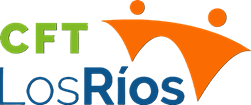
# Big Data
### Clase: Analisis Cluster
#### Profesor: Diego Miranda Olavarría
#### Data Scientist

In [1]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# Seleccionar las columnas que se utilizarán para el análisis de clúster
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

## K-Means

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

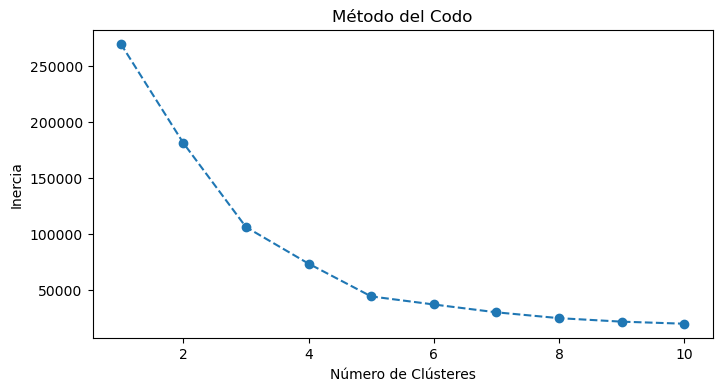

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Definir el rango de número de clústeres a probar
range_n_clusters = range(1, 11)
inertia = []

# Calcular el costo (inercia) para cada número de clústeres
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clústeres')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   k-means  
0        2  
1        2  
2        2  
3        2  
4        2  


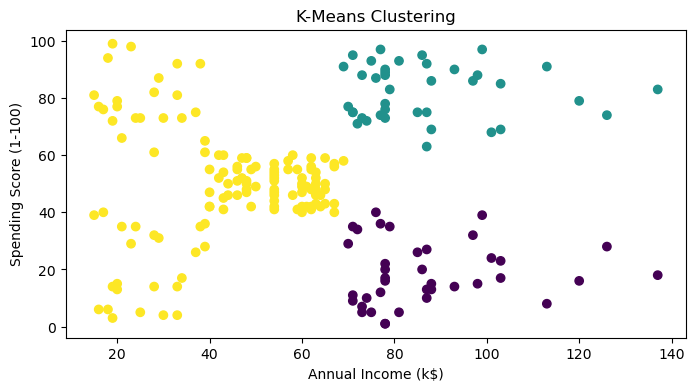

In [4]:
# Aplicar K-Means con el número óptimo de clústeres
optimal_n_clusters = 3
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans.fit(X)

# Añadir las etiquetas de los clústeres al dataframe original
df['k-means'] = kmeans.labels_

# Mostrar las primeras filas del dataframe con los clústeres asignados
print(df.head())

# Graficar los clústeres
plt.figure(figsize=(8, 4))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df['k-means'], cmap='viridis', marker='o')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')
plt.show()


## Cluster Jerarquico

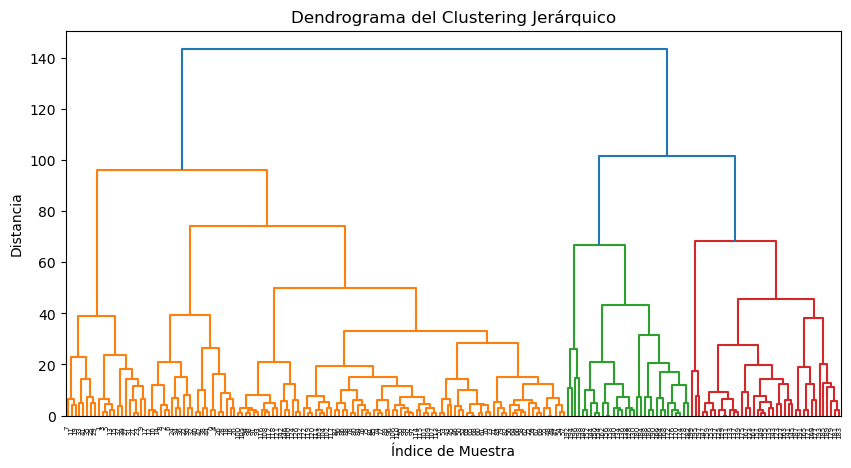

In [5]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Realizar el clustering jerárquico utilizando el método de enlace completo
Z = linkage(X, method='complete')

# Graficar el dendrograma
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia')
plt.title('Dendrograma del Clustering Jerárquico')
plt.show()


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   k-means  jerarquico  
0        2           2  
1        2           1  
2        2           2  
3        2           1  
4        2           2  


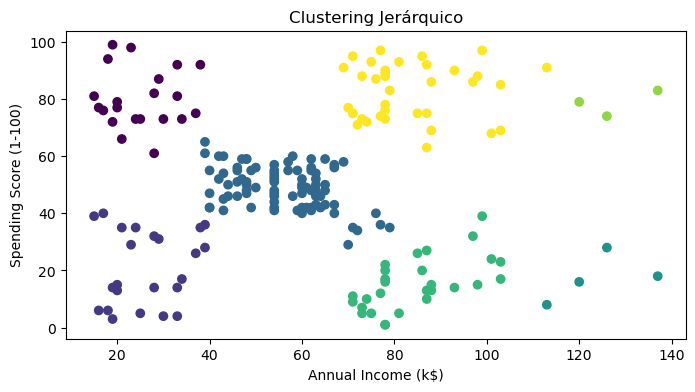

In [6]:
from scipy.cluster.hierarchy import fcluster

# Decidir el número de clústeres a partir del dendrograma
max_d = 60  # Ajusta este valor según el dendrograma
clusters = fcluster(Z, max_d, criterion='distance')

# Añadir las etiquetas de los clústeres al dataframe original
df['jerarquico'] = clusters

# Mostrar las primeras filas del dataframe con los clústeres asignados
print(df.head())

# Graficar los clústeres
plt.figure(figsize=(8, 4))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df['jerarquico'], cmap='viridis', marker='o')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering Jerárquico')
plt.show()
